In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [59]:
dataset = '../PRODIGY_ML_02/Dataset/Mall_Customers.csv'
data = pd.read_csv(dataset)

In [60]:
data.shape

(200, 5)

In [61]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [138]:
SpendingScore = data['Spending Score (1-100)']
numerics = data.drop(['Gender', 'CustomerID'], axis=1)

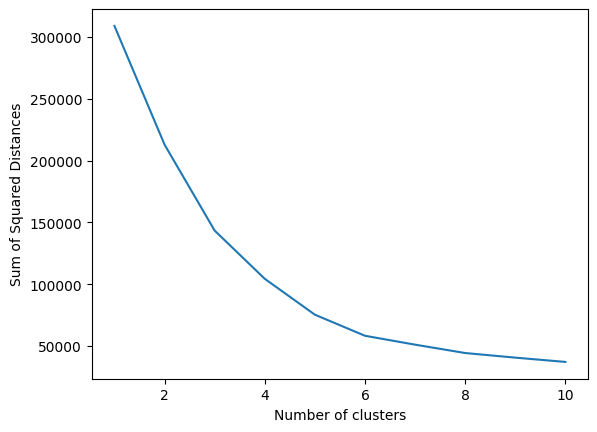

In [139]:
sumOfSquared = []
for i in range(1, 11):
    kMeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=0)
    kMeans.fit(numerics)
    sumOfSquared.append(kMeans.inertia_)

plt.plot(range(1, 11), sumOfSquared)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


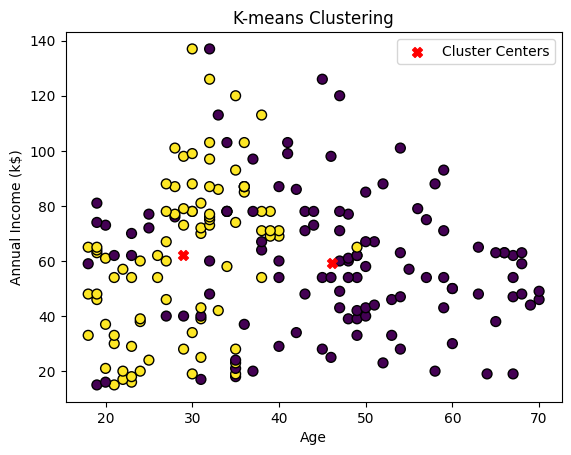

In [147]:
kMeans = KMeans(n_clusters=2, random_state=0) 
kMeans.fit(numerics)

labelled = kMeans.labels_
centers = kMeans.cluster_centers_

plt.scatter(data['Age'], data['Annual Income (k$)'], c=labelled, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=50, label='Cluster Centers')

plt.legend()
plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [148]:
print('Accuracy: {0:0.2f}'. format(sum(SpendingScore == labelled)/float(SpendingScore.size)))

Accuracy: 0.00
